# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2

Group Number: 64

Group Members:
- Nathaniel Liady (18222114)
- Gabriel Marcellino (18222115)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Import other libraries if needed
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency


# Additional settings
pd.set_option('display.max_columns',None)

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# # Example
# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

# df = pd.read_csv('https://drive.google.com/uc?id=15pnRBoG8nJRxJx3Bp8tOneZEB1XmHCYe')
df = pd.read_csv('train.csv')


In [3]:
df.head(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
5,12,899992.txt,https://www.free-marine.com,26.0,NaN,19.0,NaN,com,0.636364,NaN,0.070574,3.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.077,NaN,240.0,NaN,1.0,NaN,100.0,100.0,NaN,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,15.0,3.0,2.0,4.0,1.0,NaN,1
6,17,NaN,https://www.ridemcts.com,23.0,www.ridemcts.com,16.0,0.0,com,NaN,0.522907,NaN,3.0,1.0,NaN,NaN,0.0,10.0,0.435,NaN,0.000,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,100.0,100.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0,0.0,NaN,1.0,0.0,1.0,NaN,NaN,22.0,NaN,4.0,8.0,1
7,19,568276.txt,https://www.epner.com,NaN,NaN,NaN,0.0,com,NaN,0.522907,0.071276,3.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,0.0,NaN,0.050,1.0,1266.0,9381.0,1.0,epner,100.0,100.0,1.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,40.0,NaN,19.0,176.0,NaN,144.0,1
8,20,52998.txt,https://www.az511.com,NaN,www.az511.com,13.0,0.0,com,1.000000,NaN,0.038131,3.0,NaN,0.0,0.0,NaN,NaN,NaN,3.0,0.150,0.0,NaN,0.0,1.0,0.050,NaN,NaN,1080.0,NaN,az511,NaN,100.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,33.0,9.0,109.0,7.0,NaN,1
9,22,NaN,https://www.screenbeam.com,25.0,www.screenbeam.com,18.0,NaN,NaN,1.000000,0.522907,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,1.0,0.040,1.0,2433.0,NaN,1.0,screenbeam,100.0,100.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,5.0,0.0,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,27.0,48.0,148.0,11.0,NaN,1


In [4]:
df_copy = df.copy()

# Additional Step

## 1. Change Format Type

There are some incorrect data type (boolean but it says float). So in here, we'll change to desired data type

In [5]:
# See all columns
df_copy.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

In [6]:
bool_columns = [
    'IsDomainIP','HasObfuscation','IsHTTPS','HasTitle','HasFavicon','IsResponsive','HasDescription','Robots','HasHiddenFields','HasPasswordField',
    'HasExternalFormSubmit','HasSocialNet','HasSubmitButton','HasCopyrightInfo','Crypto','Pay','Bank'
    ]

df_copy[bool_columns]

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,Robots,HasHiddenFields,HasPasswordField,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasCopyrightInfo,Crypto,Pay,Bank
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
1,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,0.0,NaN,NaN,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
4,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,1.0,0.0,NaN,0.0
140400,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,NaN,1.0,1.0
140401,NaN,0.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0
140402,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [7]:
# Before change
df_copy[bool_columns].dtypes

IsDomainIP               float64
HasObfuscation           float64
IsHTTPS                  float64
HasTitle                 float64
HasFavicon               float64
IsResponsive             float64
HasDescription           float64
Robots                   float64
HasHiddenFields          float64
HasPasswordField         float64
HasExternalFormSubmit    float64
HasSocialNet             float64
HasSubmitButton          float64
HasCopyrightInfo         float64
Crypto                   float64
Pay                      float64
Bank                     float64
dtype: object

In [8]:
# Change the value to boolean but keep the missing values

def change_bool(value):
    if pd.isna(value):
        return value
    else:
        return bool(value)

for column in bool_columns:
    df_copy[column] = df_copy[column].apply(change_bool).astype(pd.BooleanDtype())

In [9]:
df_copy[bool_columns]

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,Robots,HasHiddenFields,HasPasswordField,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasCopyrightInfo,Crypto,Pay,Bank
0,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,False,<NA>,False,False,<NA>,<NA>,True,False,False,<NA>
1,<NA>,<NA>,<NA>,True,False,<NA>,<NA>,<NA>,<NA>,<NA>,False,<NA>,<NA>,False,False,<NA>,<NA>
2,False,<NA>,<NA>,True,True,True,<NA>,False,True,True,False,<NA>,<NA>,True,False,True,True
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,True,False,True,False
4,False,<NA>,True,<NA>,True,<NA>,True,True,False,False,<NA>,True,<NA>,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,False,False,<NA>,True,<NA>,True,<NA>,False,<NA>,False,<NA>,<NA>,False,True,False,<NA>,False
140400,False,False,<NA>,True,True,True,True,True,True,<NA>,False,True,True,True,<NA>,True,True
140401,<NA>,False,<NA>,True,False,True,True,True,<NA>,False,False,True,<NA>,True,False,False,False
140402,<NA>,False,<NA>,<NA>,<NA>,True,<NA>,<NA>,True,False,False,True,True,True,False,False,False


In [10]:
# After Change
df_copy.dtypes

id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    boolean
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                boolean
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       boolean
LineOfCode  

In [11]:
df = df_copy.copy()

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### 1. Data Size

In [12]:
# data size
print(f"data row: {df.shape[0]} rows")
print(f"data column: {df.shape[1]} columns")

data row: 140404 rows
data column: 56 columns


In [13]:
# columns
df.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

#### 2. Data Types

In [14]:
# data types of each feature
df.dtypes

id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    boolean
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                boolean
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       boolean
LineOfCode  

#### 3. Unique Values

In [15]:
# the number of unique values

df.nunique().sort_values(ascending=True)

label                              2
HasTitle                           2
HasFavicon                         2
Robots                             2
IsResponsive                       2
NoOfURLRedirect                    2
NoOfSelfRedirect                   2
IsHTTPS                            2
HasDescription                     2
HasSocialNet                       2
HasSubmitButton                    2
HasHiddenFields                    2
HasPasswordField                   2
Bank                               2
Pay                                2
HasExternalFormSubmit              2
Crypto                             2
HasCopyrightInfo                   2
IsDomainIP                         2
HasObfuscation                     2
NoOfQMarkInURL                     4
NoOfSubDomain                      8
NoOfObfuscatedChar                 8
TLDLength                         11
NoOfEqualsInURL                   14
NoOfAmpersandInURL                16
ObfuscationRatio                  26
N

#### 4. Statistical Informations

In [16]:
# Statistical Informations

# Take Numerical Categories
num_categories = df.select_dtypes(include='number')

In [17]:
# Numerical Columns
num_categories.columns

Index(['id', 'URLLength', 'DomainLength', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
       'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [18]:
num_categories.describe()

,id,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfURLRedirect,NoOfSelfRedirect,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,140404.000000,79765.000000,94085.000000,92362.000000,87531.000000,88333.000000,92673.000000,96344.000000,73606.000000,75806.000000,77066.000000,74658.000000,81594.000000,86896.000000,78826.000000,96303.000000,95017.000000,92775.000000,77570.000000,71251.000000,7.247600e+04,90407.000000,88188.000000,73020.000000,73689.000000,97051.000000,90460.000000,89932.000000,73270.000000,79603.000000,92272.000000,97718.000000,71025.000000,140404.000000
mean,117682.632746,27.701473,19.619387,0.918007,0.277482,0.059286,2.729015,1.161442,0.005951,0.000028,14.125178,0.483299,0.355737,0.006609,0.010238,0.004901,0.003473,1.433350,0.050954,1796.978470,8.283455e+03,70.832896,71.133832,0.121679,0.028756,0.359749,2.508125,41.647489,10.268623,16.461729,104.875900,3.733846,78.104273,0.924831
std,68122.005080,23.140676,5.833808,0.159142,0.248115,0.008063,0.533310,0.445054,1.082855,0.001697,15.905539,0.101771,3.386914,0.033156,0.242953,0.079828,0.241136,2.021879,0.022624,3772.263209,7.490477e+04,45.039128,44.886539,0.326917,0.167121,4.788340,7.815329,102.538702,133.321659,21.001274,219.137035,24.192458,187.106965,0.263664
min,1.000000,14.000000,4.000000,0.000000,0.000000,0.001229,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58689.500000,23.000000,16.000000,0.913043,0.012927,0.055542,2.000000,1.000000,0.000000,0.000000,10.000000,0.409000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.036000,516.000000,7.120000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,6.000000,24.000000,0.000000,13.000000,1.000000
50%,117421.500000,26.000000,19.000000,1.000000,0.522907,0.060264,3.000000,1.000000,0.000000,0.000000,13.000000,0.483000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.043000,1014.000000,2.681000e+03,100.000000,100.000000,0.000000,0.000000,0.000000,1.000000,23.000000,5.000000,12.000000,69.000000,0.000000,39.000000,1.000000
75%,176724.250000,30.000000,23.000000,1.000000,0.522907,0.064391,3.000000,1.000000,0.000000,0.000000,16.000000,0.552000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.057000,1964.000000,9.381000e+03,100.000000,100.000000,0.000000,0.000000,0.000000,2.000000,45.000000,12.000000,22.000000,132.000000,3.000000,99.000000,1.000000
max,235795.000000,4054.000000,93.000000,1.000000,0.522907,0.088766,13.000000,7.000000,291.000000,0.212000,2997.000000,0.865000,433.000000,0.600000,31.000000,3.000000,52.000000,470.000000,0.270000,440155.000000,1.369832e+07,100.000000,100.000000,1.000000,1.000000,602.000000,1602.000000,8956.000000,35820.000000,2828.000000,26596.000000,4887.000000,27516.000000,1.000000


#### 5. Purposes for doing the 4 steps

- Data Size and Data Types: <br>
    When we know the data size, it can helps us to understand amount of space of the data we are working on. It helps us to distinct proportional when splitting the data. For the data types in each features, it helps us understand which value that can be use in certain analysis (e.g. statistical informations from numerical data type)
 <br>

- Unique Values: <br>
  To understand how much (unique) values in each features. We can identify continuous or categorical data based on amount of unique values each features
<br>

- Statistical Informations: <br>
  It can help on finding statistical semantic each features based on mean, standard deviation (how far the values from the mean), quartile (amount of values under each quartile), min max values. With this informations, we could detect outliers or anomalies on the data ( one example: max in URLLength beyond the 75% quartile,which is 30).

<br>

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### 1. Missing Values

percentage missing values from all of the data

In [19]:
missing_percentage = ((df.isna().sum() * 100 / len(df)).round(4))
df_missing_percentage = missing_percentage.to_frame(name='Missing Values (%)').sort_values(by='Missing Values (%)',ascending=True)

print(df_missing_percentage)

                            Missing Values (%)
id                                      0.0000
label                                   0.0000
IsDomainIP                             30.0063
IsResponsive                           30.2997
NoOfEmptyRef                           30.4023
Pay                                    30.7498
NoOfPopup                              30.8773
URL                                    30.9728
HasHiddenFields                        31.1921
NoOfSubDomain                          31.3809
NoOfQMarkInURL                         31.4101
HasTitle                               31.7505
NoOfAmpersandInURL                     32.3260
TLD                                    32.3345
DomainLength                           32.9898
Robots                                 33.2840
NoOfOtherSpecialCharsInURL             33.9228
TLDLength                              33.9955
CharContinuationRate                   34.2170
NoOfSelfRef                            34.2811
IsHTTPS      

#### 2. Outliers
we will handle outliers on the next step

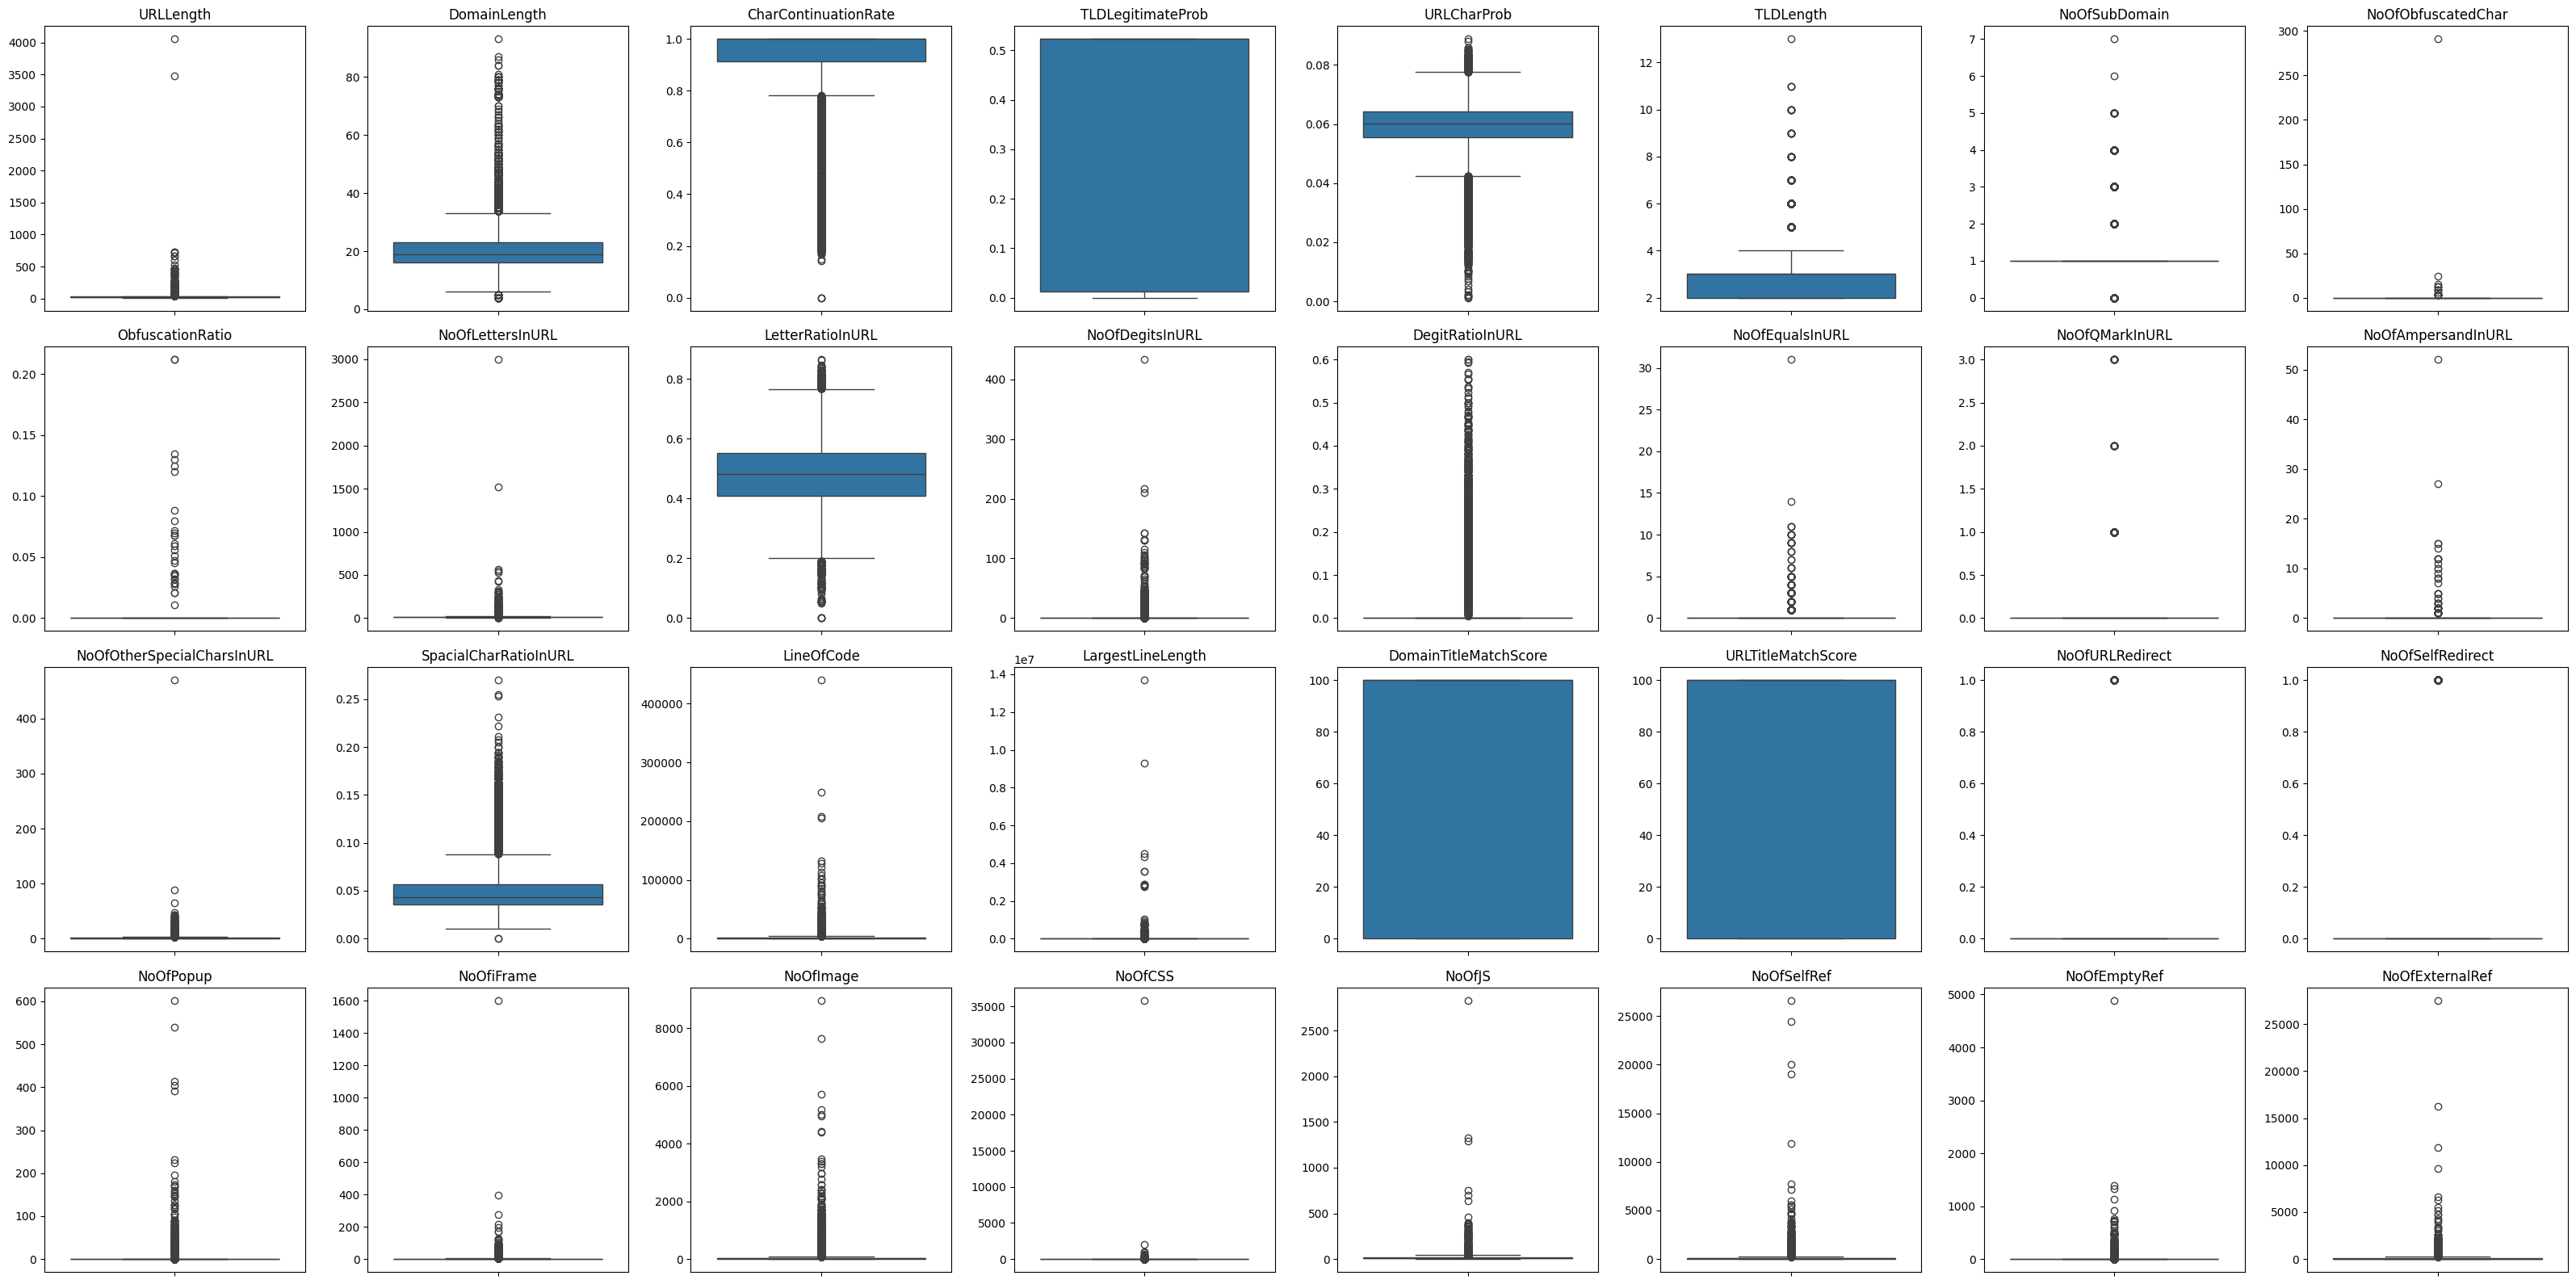

In [20]:
# Outliers plot without id and label
num_categories_exc = num_categories.select_dtypes(exclude='int64')
fig,axs = plt.subplots(ncols=8,nrows=4,figsize=(32,16))
axs = axs.flatten()

for i, col in enumerate(num_categories_exc.columns):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
plt.tight_layout()
plt.show()

#### 3. Explanation why need to find missing values and outliers

- Missing Values: <br>
  Missing values could leading to bad model predict. With information the amount of the missing values, it helps us to distinct whether we are going to keep the features by give the missing values a new value (feature imputer) or will remove it from the dataset
<br>

- Outliers: <br>
  This is a anomalie value. By semantically correct, it doesn't fit to the value space which can disrupt how the model read the data. Same with the missing values, we can do a modification in the next step

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [21]:
# Sampling plot
# to reduce computational works
df_plot = df.sample(n=int(len(df) * 0.1),random_state=42)

#### 1. Correlations

##### Numerical Features

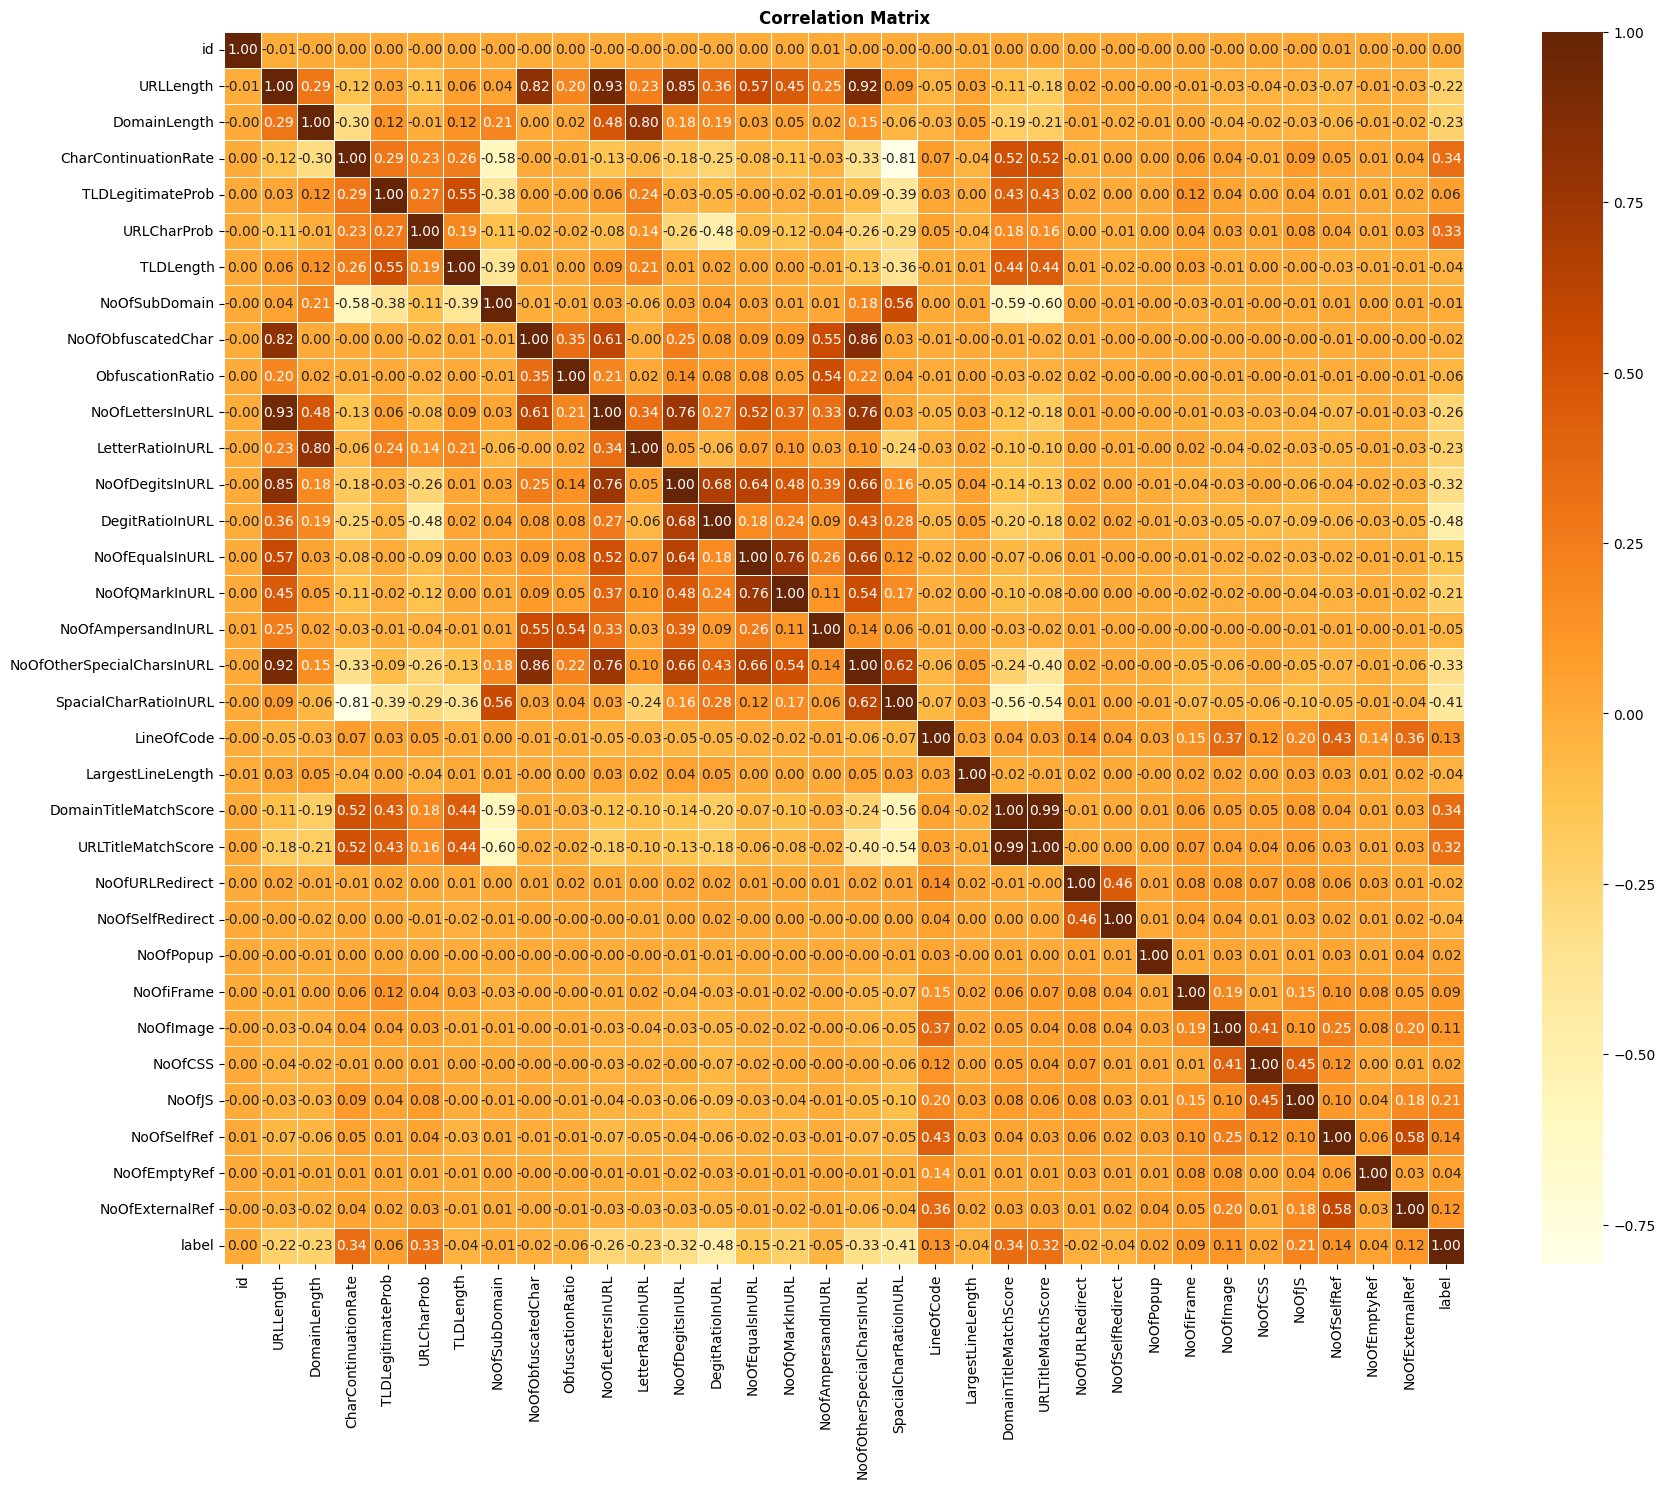

In [22]:
corr = num_categories.corr(method='pearson')
fig
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5,cmap='YlOrBr')
plt.title('Correlation Matrix',weight='bold')
plt.show()

#### 2. Distribution
note: we are not plot all of the data and only take half from all of the data. <br>
this action is to reduce computational works

In [23]:
# Function to plot distribution

def plot_distribution(data,label='label',type='categorical'):
    '''
    Plot all numerical features: either categorical or continuous by label

    data    : dataframe
    label   : label column
    '''
    if type =='categorical':
        features = data.select_dtypes(include=['bool']).columns
    elif type == 'continuous':
        features = data.select_dtypes(include=['number']).columns


    n_cols = 4
    n_rows = int(np.ceil(len(features)/n_cols))

    fig,axs = plt.subplots(n_rows,n_cols,figsize=(20,5 * n_rows))
    axs = axs.flatten()

    for i,col in enumerate(features):
        ax = axs[i]
        if type=='continuous':
            sns.histplot(data=data,x=col,hue = label,ax=ax)
            ax.set_title(f"Distribution of {col}")
            ax.set_ylabel("Frequency")

        else:
            crosstab = pd.crosstab(data[col],data[label])
            sns.heatmap(crosstab,annot=True,cmap="Blues",ax=ax)
            ax.set_title(f"Features {col} by label")

        if i >= len(features):
            ax[i].axis('off')

    plt.tight_layout()
    plt.show()



##### 2.1. Distribution (Categorical)

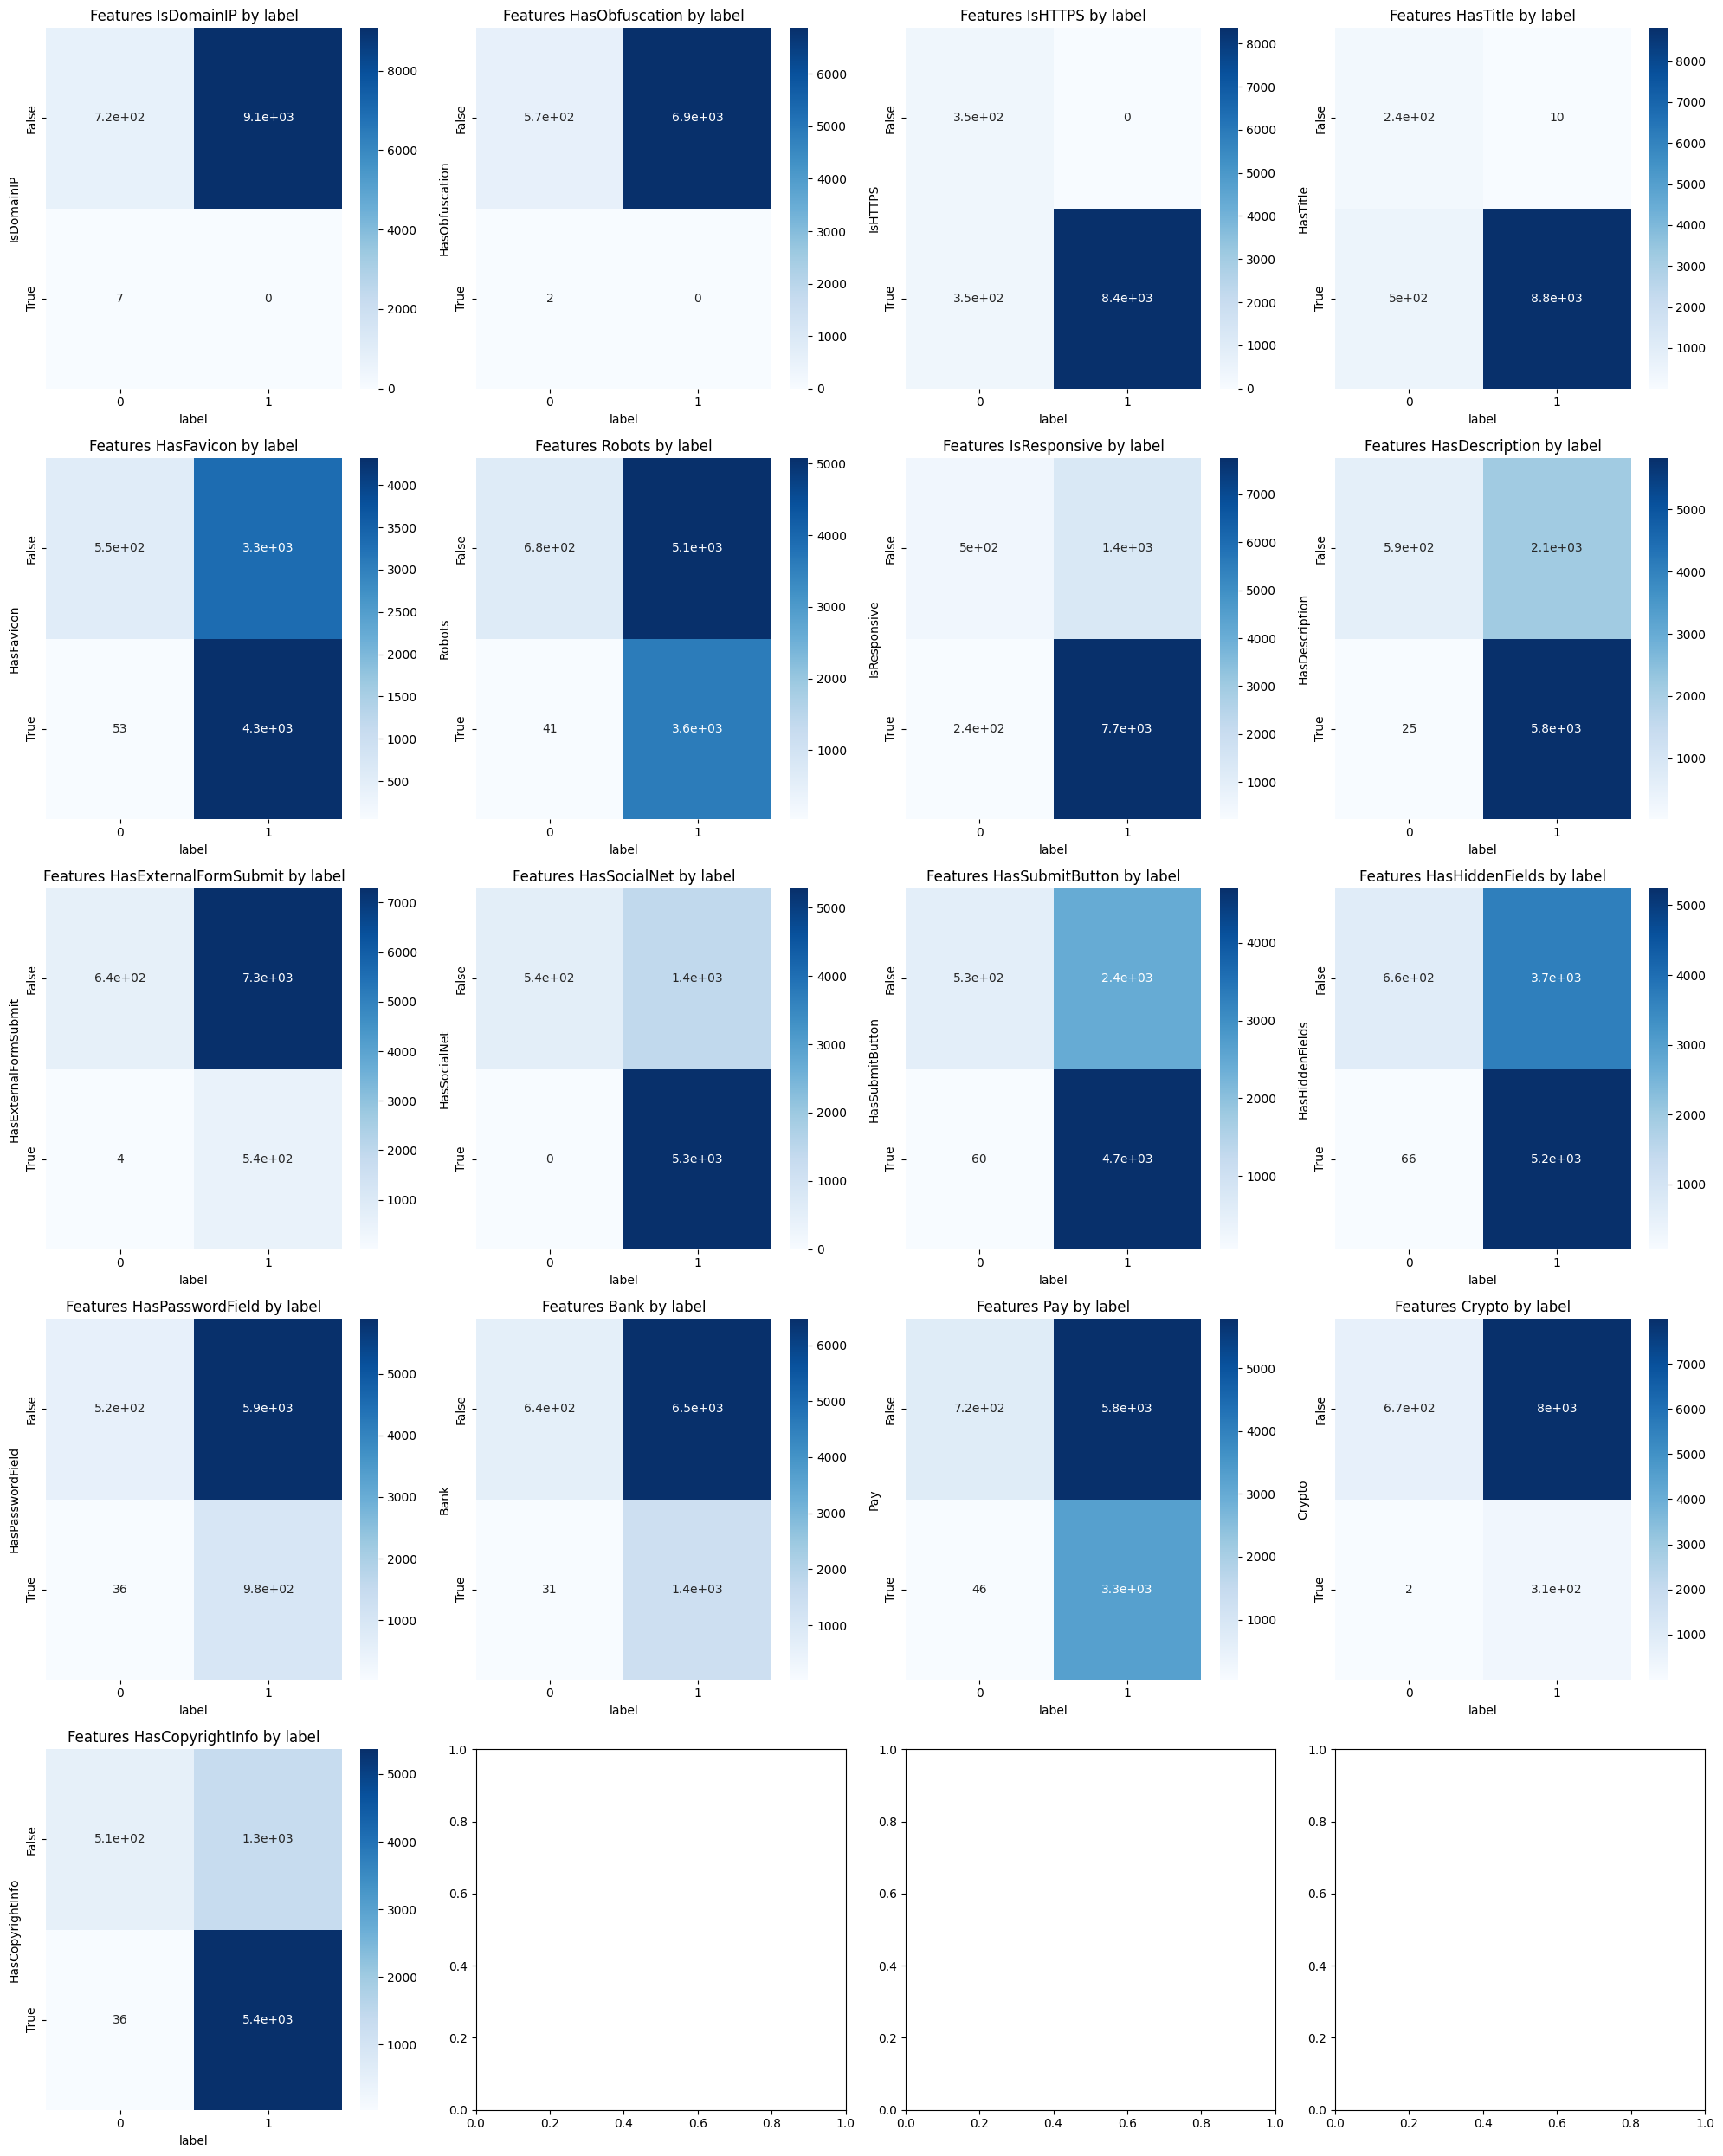

In [24]:
plot_distribution(df_plot,type='categorical')

##### 2.2. Distribution (Continuous)

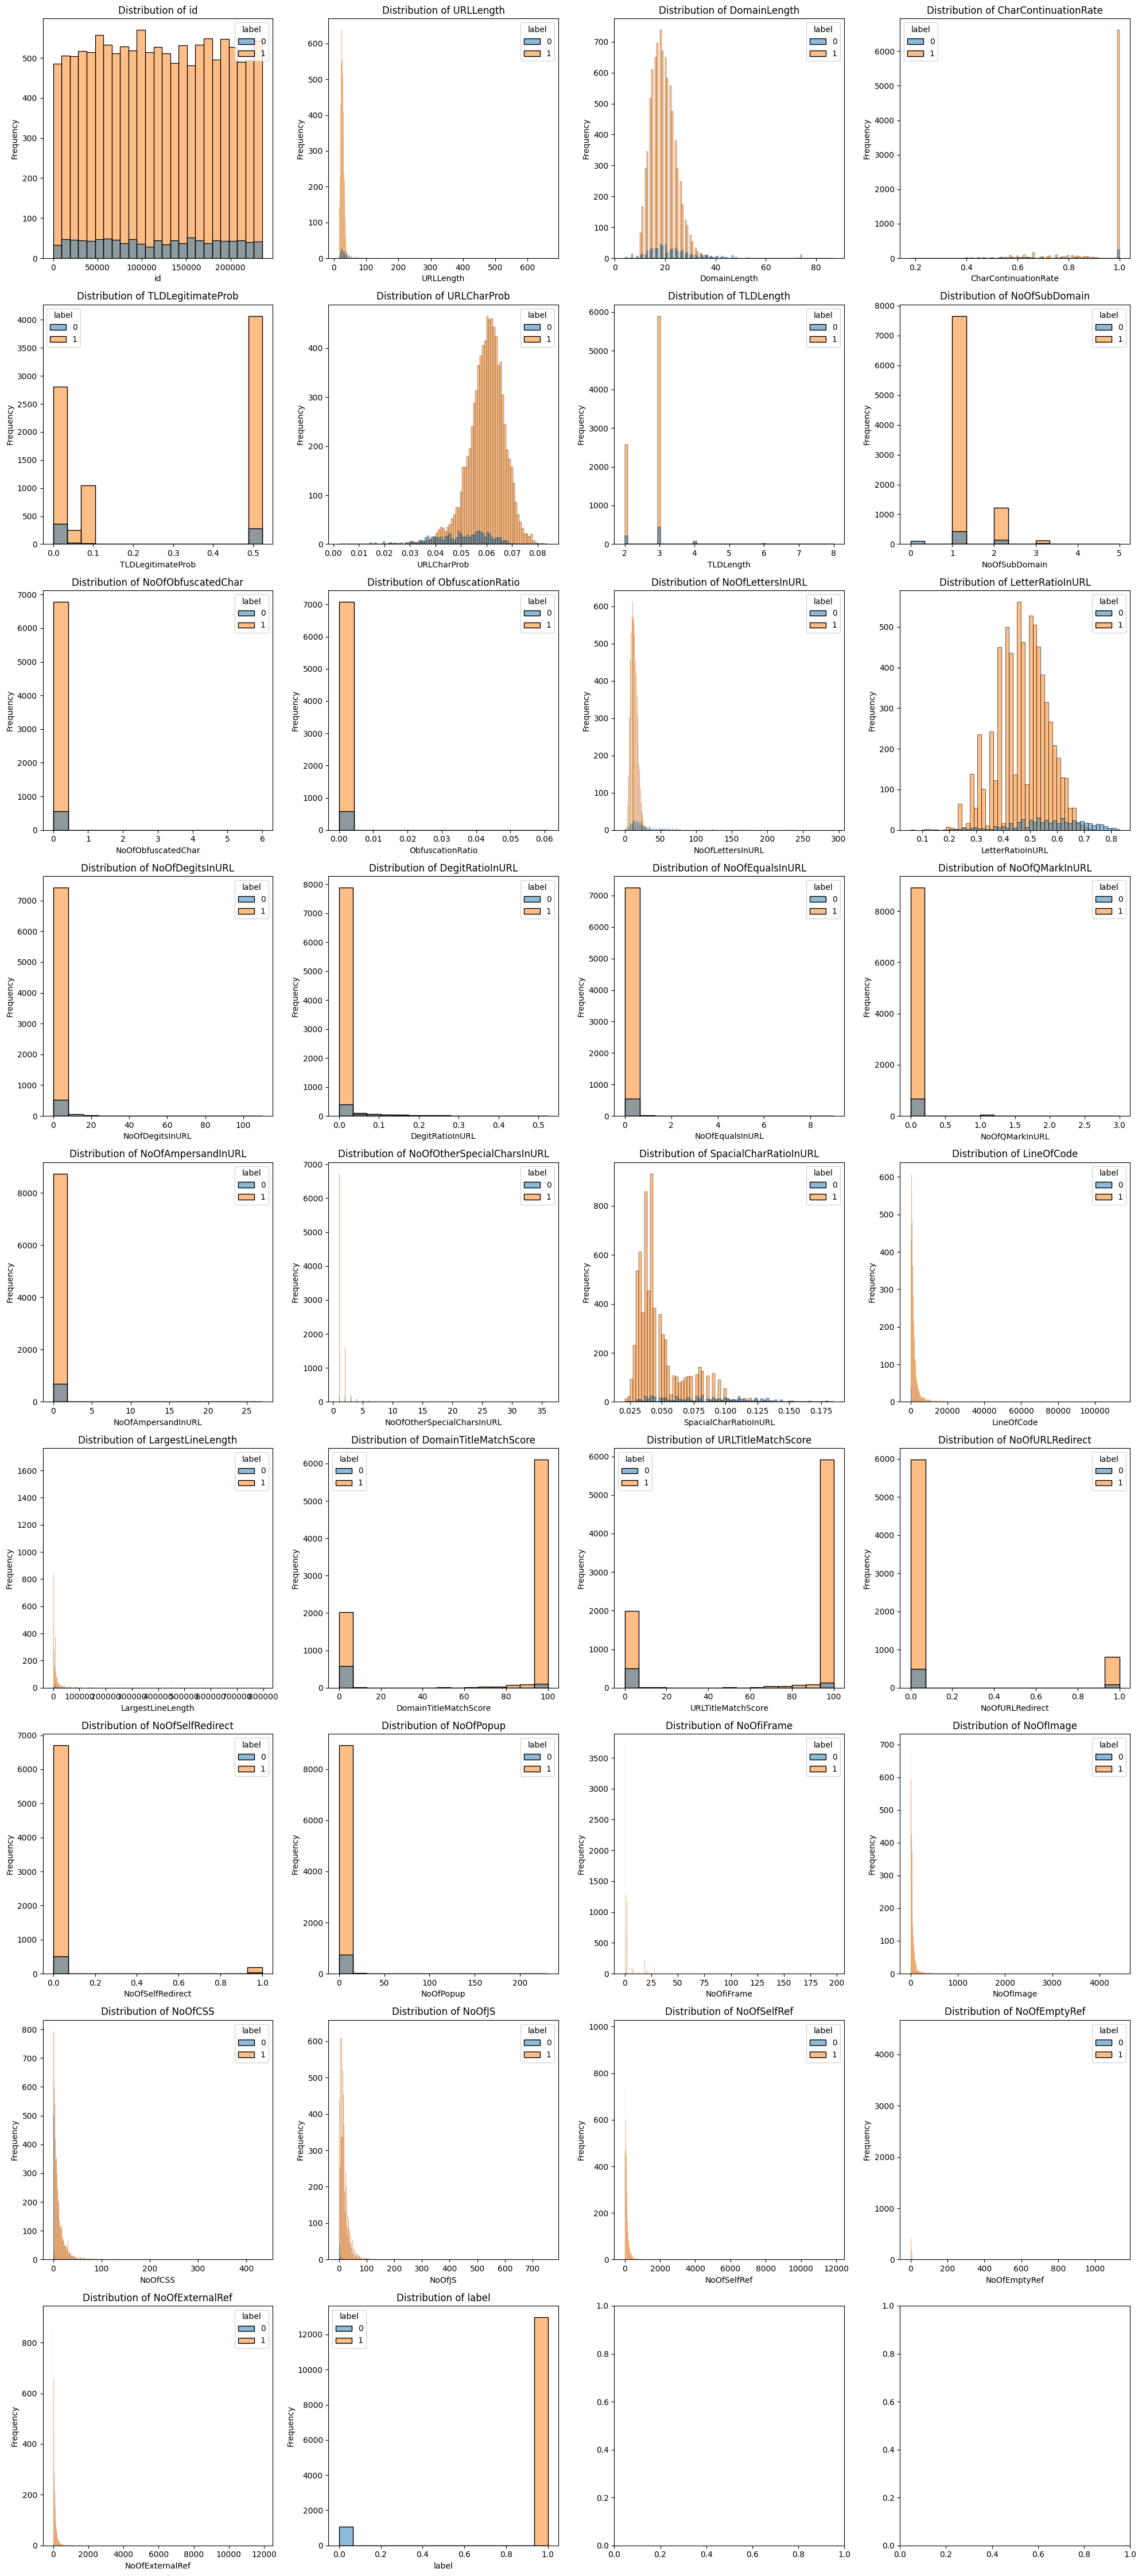

In [25]:
plot_distribution(df_plot,type='continuous')

#### 3. Visualization features and target

In [26]:
def plot_by_label(data, target, y_type='categorical', type_plot='countplot'):
    '''
    Function to plot all of either categorical/continuous features by categorical target (label)
    
    data: features columns (either categorical or continuous) in Series
    target: label (categorical or binary)
    y_type: type of the feature type (categorical / continuous)
    type_plot: type of plot you want
    if y_type == 'continuous' -> type_plot options: 'box plot', 'violin plot', 'hist', 'barplot'
    if y_type == 'categorical' -> type_plot options: 'heatmap'
    '''
    assert y_type in ['categorical', 'continuous'], 'y_type must be categorical or continuous'

    if y_type =='categorical':
        features = data.select_dtypes(include=['boolean']).columns
        #handling missing values
        data[features].fillna(False,inplace=True,axis=0)
    elif y_type == 'continuous':
        features = data.select_dtypes(include=['number']).columns

    n_features = len(features)
    
    ncols = 3  
    nrows = int(np.ceil(n_features / ncols))  

    
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 5 * nrows))
    axs = axs.flatten()
    
    
    for i, col in enumerate(features):
        ax = axs[i] 
    
        if y_type == 'categorical':
            
            if type_plot == 'heatmap':
                crosstable = pd.crosstab(data[col],data[target])
                sns.heatmap(crosstable,annot=True,cmap='Blues',cbar=False,ax=ax)
                ax.set_title(f"Features {col} by label")
                
                
        else:
            if type_plot == 'box':
                sns.boxplot(x=data[target], y=data[col], ax=ax)
                ax.set_title(f"Features {col} by label")
            elif type_plot == 'violin':
                sns.violinplot(x=data[target], y=data[col], ax=ax)
                ax.set_title(f"Features {col} by label")
            elif type_plot == 'hist':
                sns.histplot(data=data, x=col, hue=target, multiple='stack', ax=ax)
                ax.set_title(f"Features {col} by label")
            elif type_plot == 'bar':
                sns.barplot(x=data[col], y=data[target], estimator=np.mean, ax=ax)
                ax.set_title(f"Features {col} by label")
    
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    
    plt.tight_layout()
    plt.show()


In [27]:
# Features to plot
categorical_features = [
    'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
    'HasDescription', 'HasPasswordField', 'HasExternalFormSubmit',
    'Bank', 'Pay', 'Crypto', 'HasSocialNet', 'Robots',
    'IsResponsive', 'label'
]
continuous_features = [
    'URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb',
    'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar',
    'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
    'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
    'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
    'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
    'NoOfExternalRef','label'
]

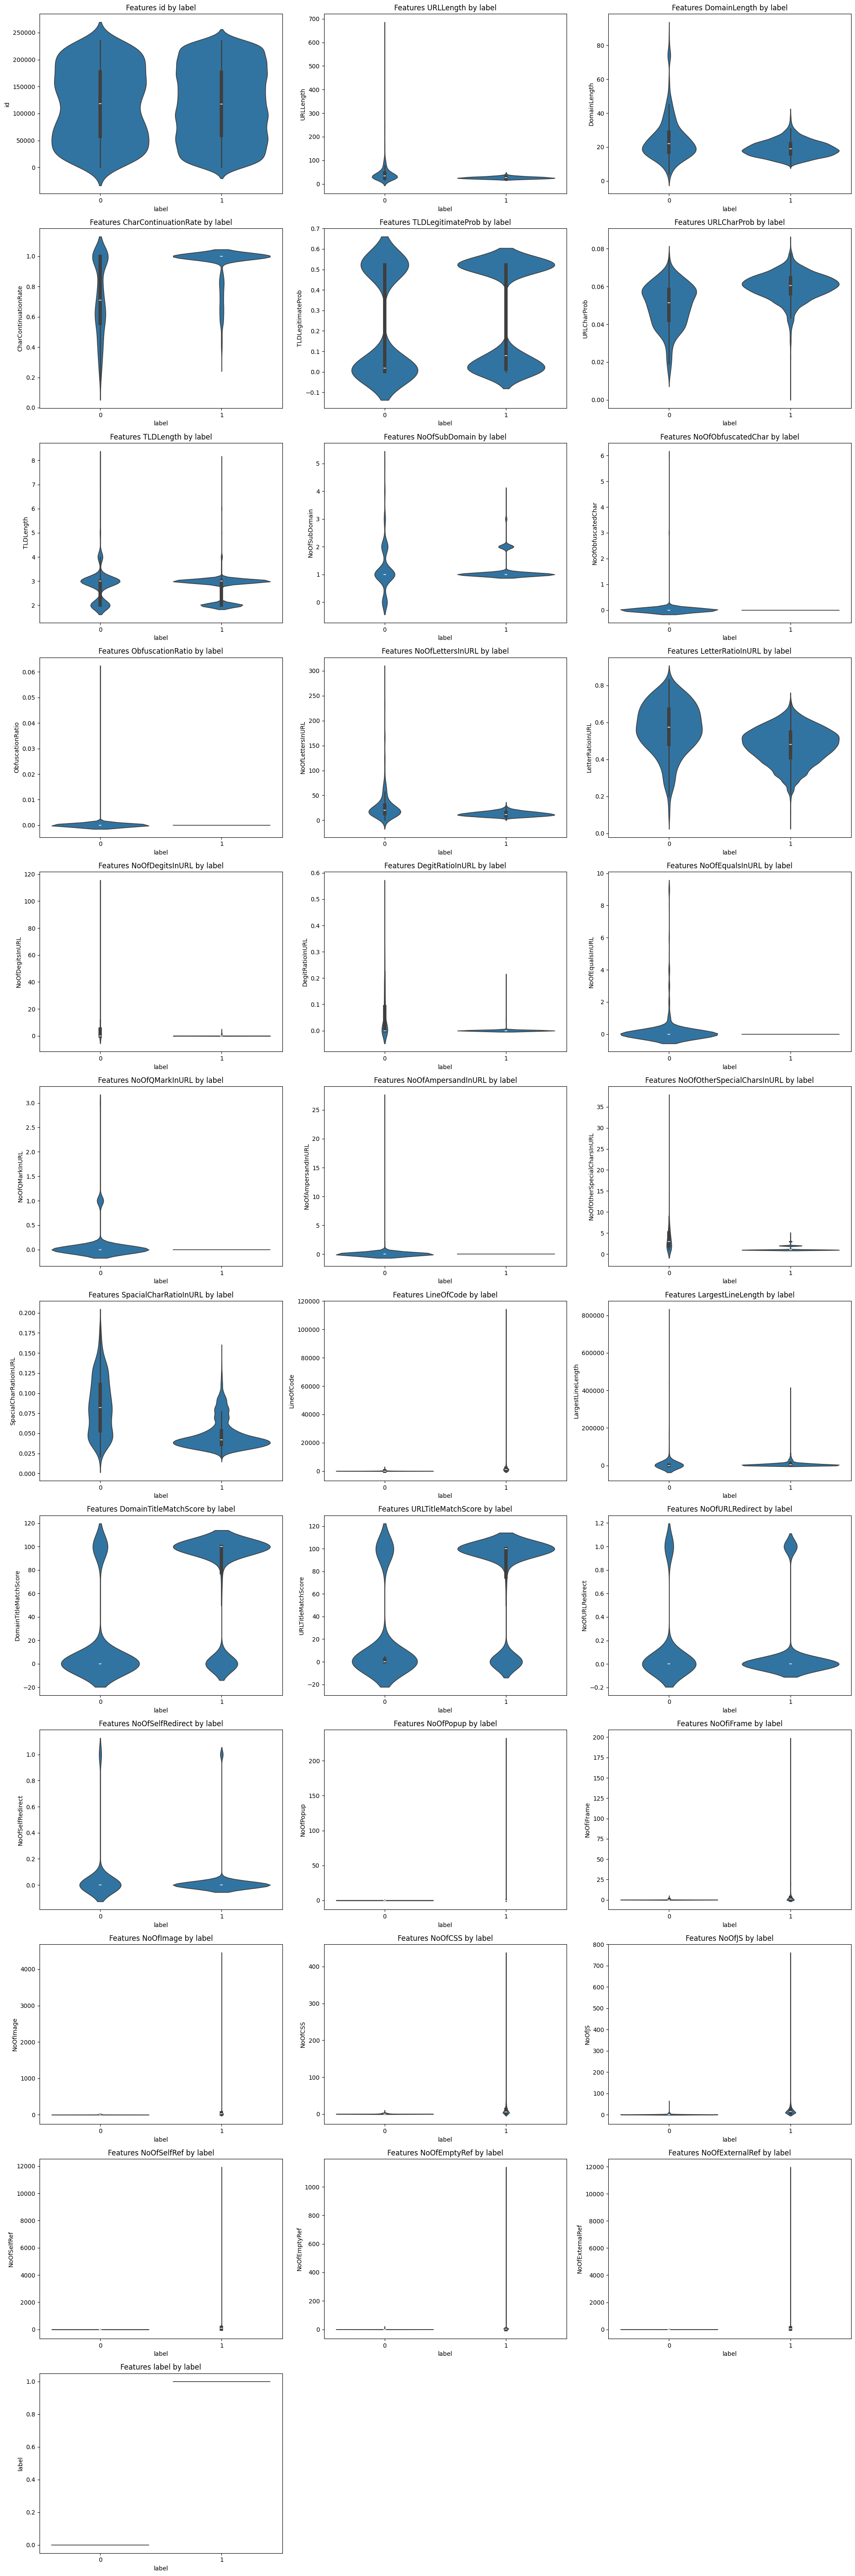

In [28]:
#Continuous
plot_by_label(data=df_plot,target='label',y_type='continuous',type_plot='violin')

In [29]:
# Categorical

def chi2_results(data,target='label',alpha = 0.05):
    results = []
    features = data.select_dtypes('bool').columns
    for column in features:
        crosstable = pd.crosstab(data[column],data[target])
        chi2, p, dof, expected = chi2_contingency(crosstable)
        if p < alpha:
            hypo = 'Reject'
        else:
            hypo = 'Accept'
        results.append(
            {
                'Features': column,
                'Chi2': chi2,
                'P-values': p,
                'H0': hypo
            }
        )
    return pd.DataFrame(results)

H0  : feature are not related to label <br>
H1  : feature are related to label

In [30]:
chi2_results(df_plot)

,Features,Chi2,P-values,H0
0,IsDomainIP,73.971603,7.924889e-18,Reject
1,HasObfuscation,12.832890,3.405793e-04,Reject
2,IsHTTPS,4309.805070,0.000000e+00,Reject
3,HasTitle,2785.620204,0.000000e+00,Reject
4,HasFavicon,506.176580,4.306133e-112,Reject
5,Robots,357.550839,9.613614e-80,Reject
6,IsResponsive,1247.221531,3.333546e-273,Reject
7,HasDescription,1249.825699,9.056622e-274,Reject
8,HasExternalFormSubmit,38.220752,6.317697e-10,Reject
9,HasSocialNet,1570.681924,0.000000e+00,Reject


#### 4. Explain the significance of understanding

It helps us to understand whether the features give significance effect to the target based on the data history.<br>
- For continuous:
    We can see the trends of which feature with a lot of label in it. So we can understand a certain feature who gives effect to the prediction
- For categorical:
    We can see which features who have relation with the label based on Null Hypothesis

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

In [31]:
df_insight = df.copy()

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

In [32]:
# Categorizing the propotion between phising and non-phising URLs from label, with security related features (IsHTTPS, Robots)
categorical_features = [
    'IsHTTPS', 'Robots','label'
]

C:\Users\User_HP\AppData\Local\Temp\ipykernel_17136\184648733.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features].fillna(False,inplace=True,axis=0)


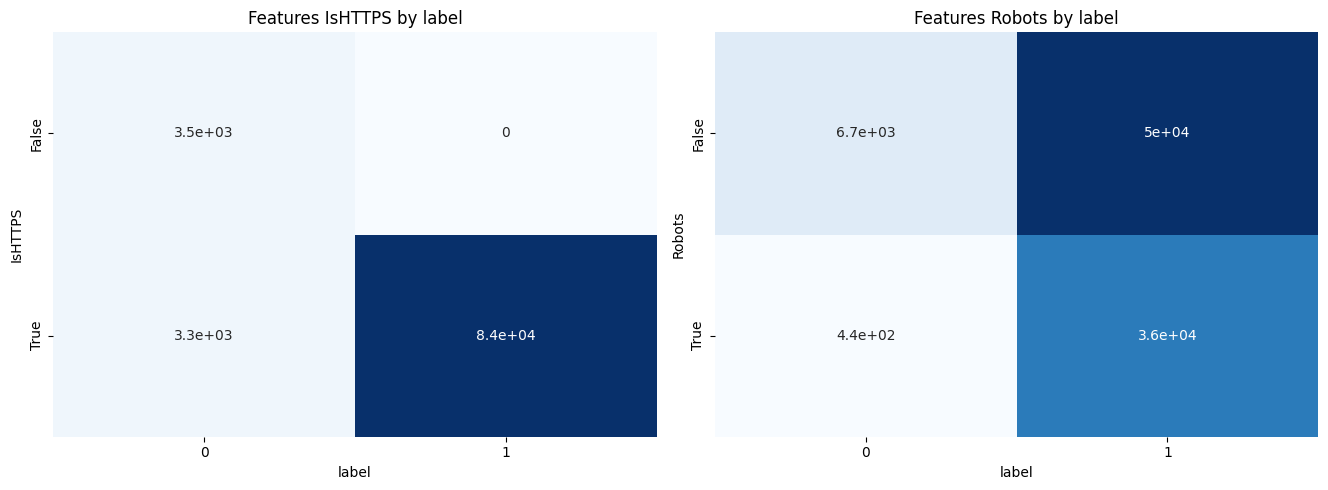

In [33]:
plot_by_label(df_insight[categorical_features], target='label', y_type='categorical', type_plot='heatmap')

#### Conclusion:
- The IsHTTPS:
    The IsHTTPS feature has a strong correlation with label = 1. Instances with label = 1 almost always have IsHTTPS = True. 
- The Robots:
    feature has a mixed impact on both labels. However, for label = 1, a significant number of instances (36,000) have Robots = True, showing its possible relevance for distinguishing between the labels.

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

In [35]:
URL_char = df_insight[['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLegitimateProb', 'CharContinuationRate',
            'TLDLength', 'NoOfSubDomain','HasObfuscation', 'NoOfObfuscatedChar', 
            'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
            'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL','NoOfAmpersandInURL', 
            'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'label']]

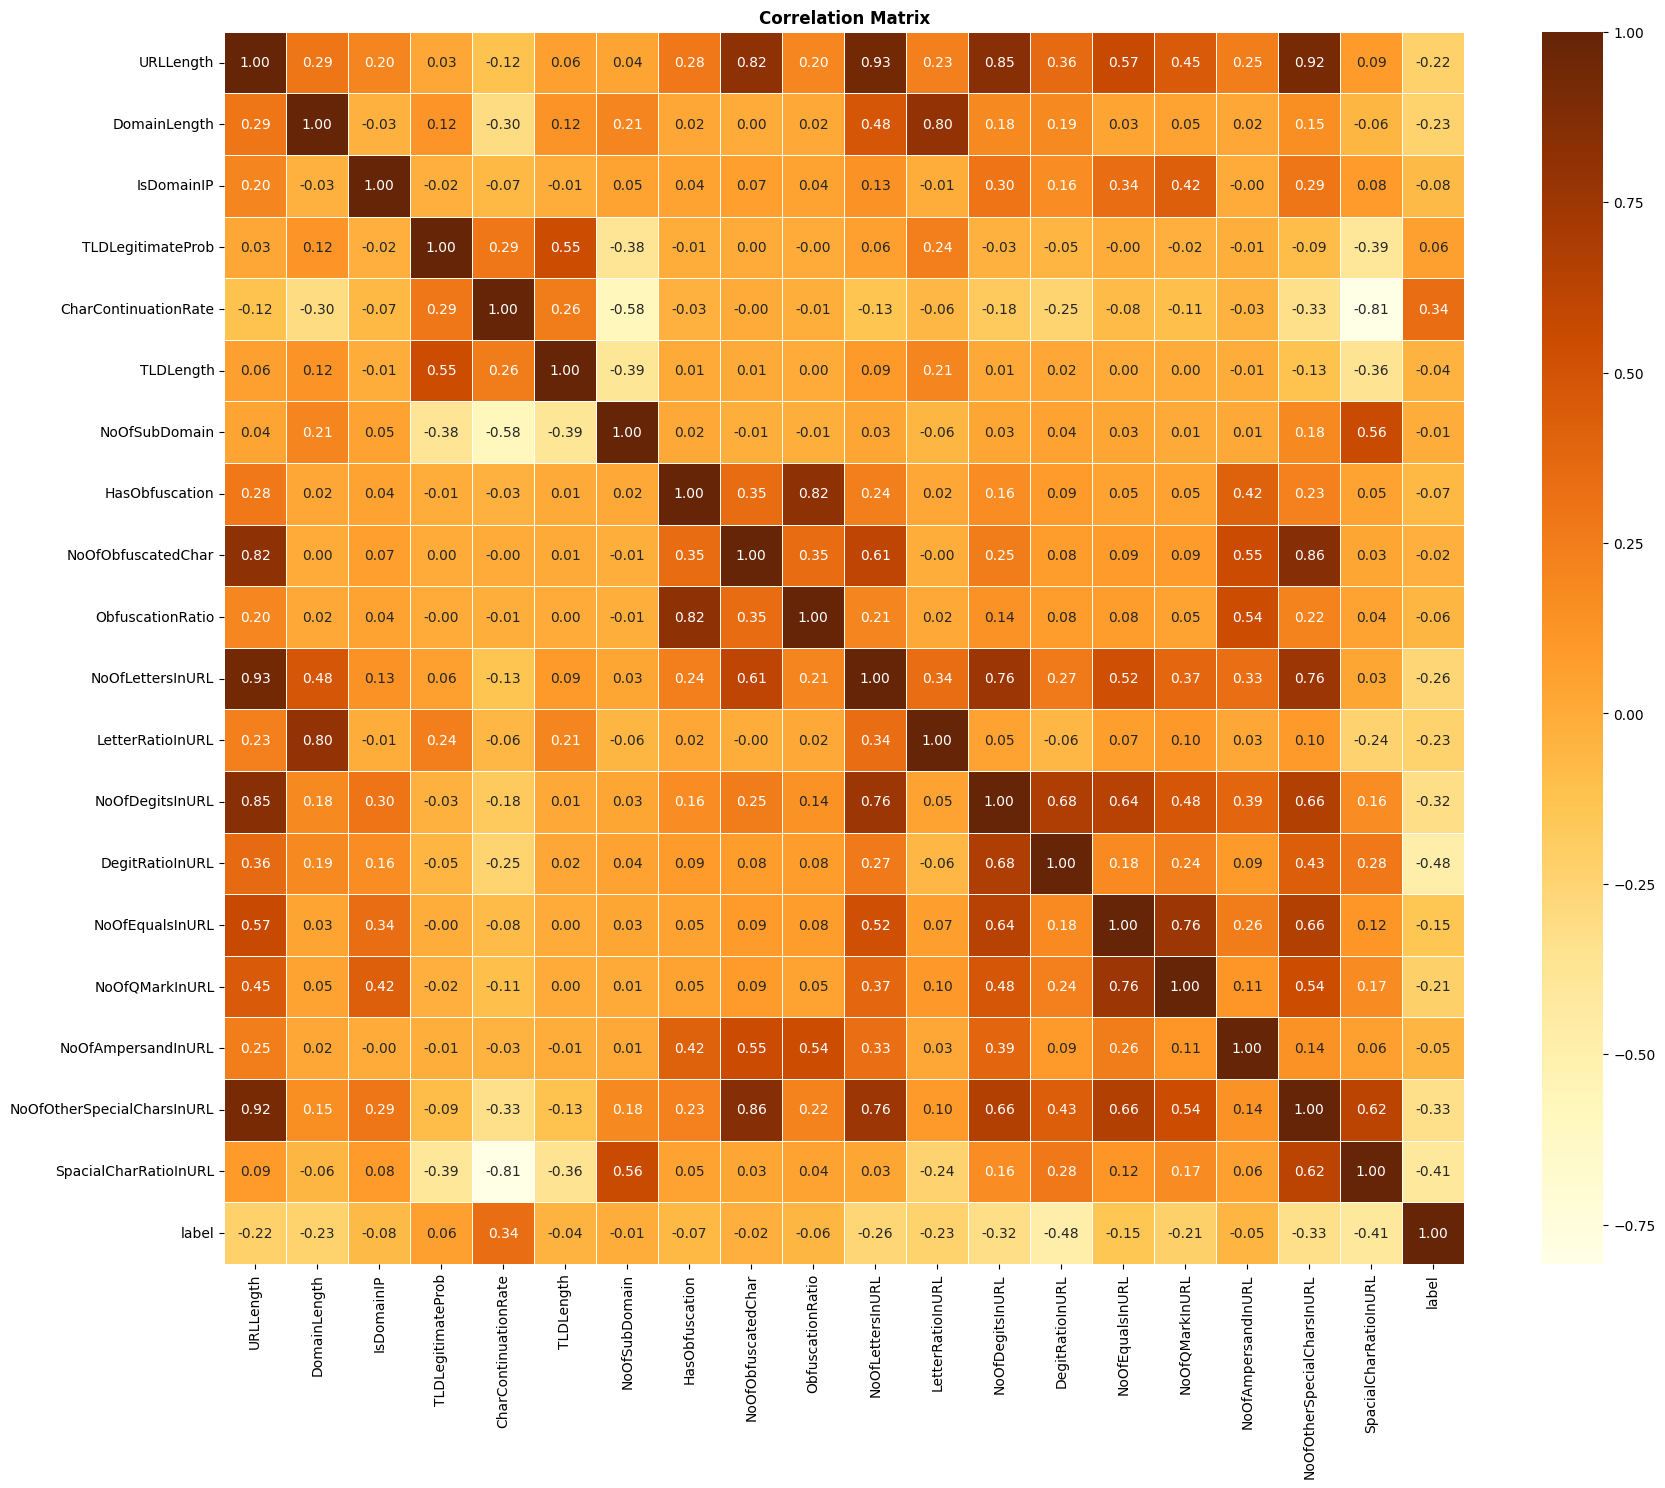

In [36]:
corr = URL_char.corr(method='pearson')
fig
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5,cmap='YlOrBr')
plt.title('Correlation Matrix',weight='bold')
plt.show()

#### Conclusion:
- Positive Correlations: 
    - Features like URLLength and NoOfLettersInURL have strong positive correlations (close to 1), indicating that longer URLs tend to have more letters.
    - NoOfObfuscatedChar and ObfuscationRatio are highly correlated, as expected, because obfuscation ratio depends on obfuscated characters.
- Negative Correlations:
    - Features like CharContinuationRate and TLDLegitimateProb show a strong negative correlation, suggesting that higher continuation rates might correlate with less legitimate top-level domains.
- Relationship with Phising and non-Phising URLs:
    - Features such as NoOfDigitsInURL and SpecialCharRationInURL have moderate negative correlations with label. This could indicate a tendency for malicious websites to have more digits and special characters in their URLs.
    - URLLength shows a slight negative correlation with label, suggesting longer URLs might be more common in malicious sites.

#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

In [38]:
def idx_highest_value(data, feature):
    q3 = data[feature].quantile(0.75)
    filtered_data = data[data[feature] > q3]
    sorted_data = filtered_data.sort_values(by=feature)
    return sorted_data.index.to_numpy(), sorted_data[feature].to_numpy()


##### Phising and non-phising URLs distribution across NoOfImage feature
With NoOfImage distribution limited to 300 (So we can get a better insight)

In [39]:
df_insight['NoOfImage'].describe()

count    89932.000000
mean        41.647489
std        102.538702
min          0.000000
25%         10.000000
50%         23.000000
75%         45.000000
max       8956.000000
Name: NoOfImage, dtype: float64

In [40]:
idx_highest_value(df_insight,'NoOfImage')

(array([59057, 61511, 33597, ..., 18122, 72377, 92475], dtype=int64),
 array([  46.,   46.,   46., ..., 5699., 7641., 8956.]))

In [41]:
NoOfImage_features = [
    'NoOfImage', 'label'
]

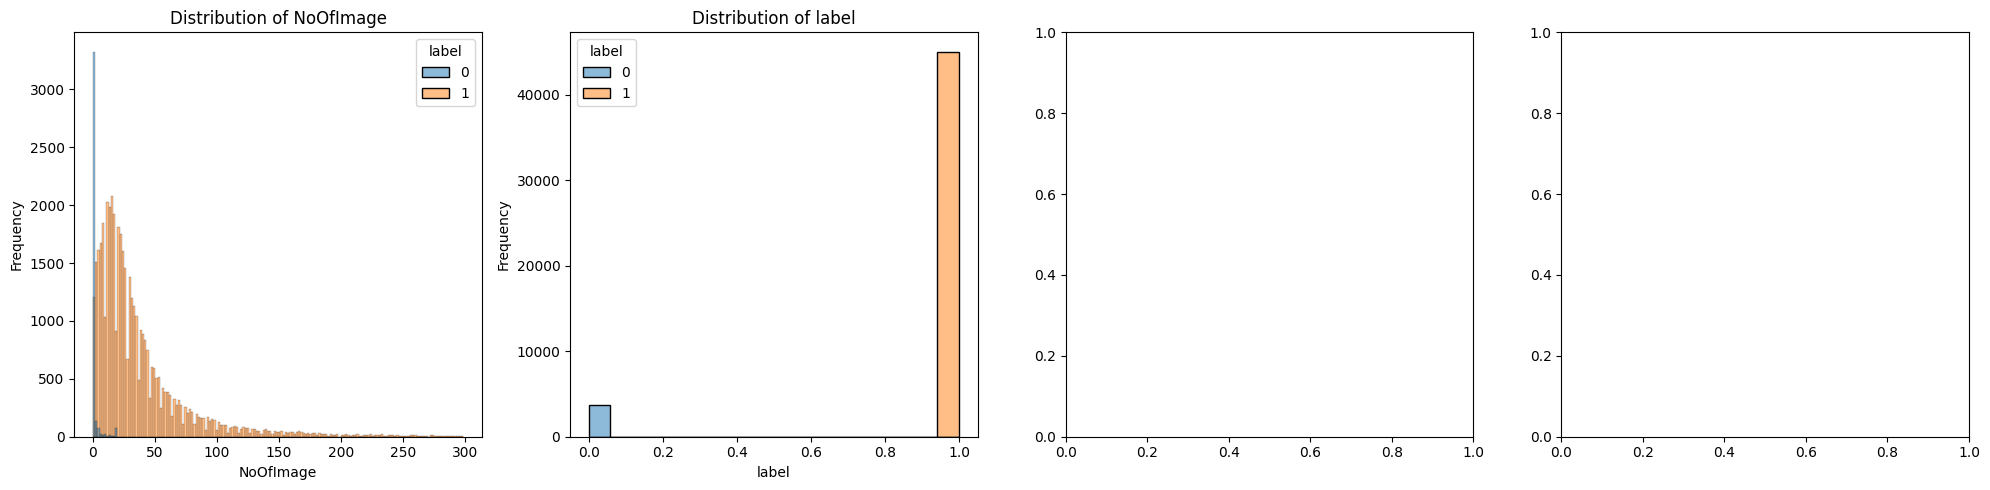

In [81]:
df_noOfImage = df_insight[df_insight['NoOfImage'] < 300]
plot_distribution(df_noOfImage[NoOfImage_features],type='continuous')

##### Phising and non-phising URLs distribution across NoOfCSS feature
With NoOfCSS distribution limited to 200

In [43]:
df_insight['NoOfCSS'].describe()

count    73270.000000
mean        10.268623
std        133.321659
min          0.000000
25%          2.000000
50%          5.000000
75%         12.000000
max      35820.000000
Name: NoOfCSS, dtype: float64

In [44]:
idx_highest_value(df_insight,'NoOfCSS')

(array([ 27305,  34144,  71730, ..., 130197,  86879,  92475], dtype=int64),
 array([1.300e+01, 1.300e+01, 1.300e+01, ..., 1.041e+03, 2.021e+03,
        3.582e+04]))

In [45]:
NoOfCSS_features = [
    'NoOfCSS', 'label'
]

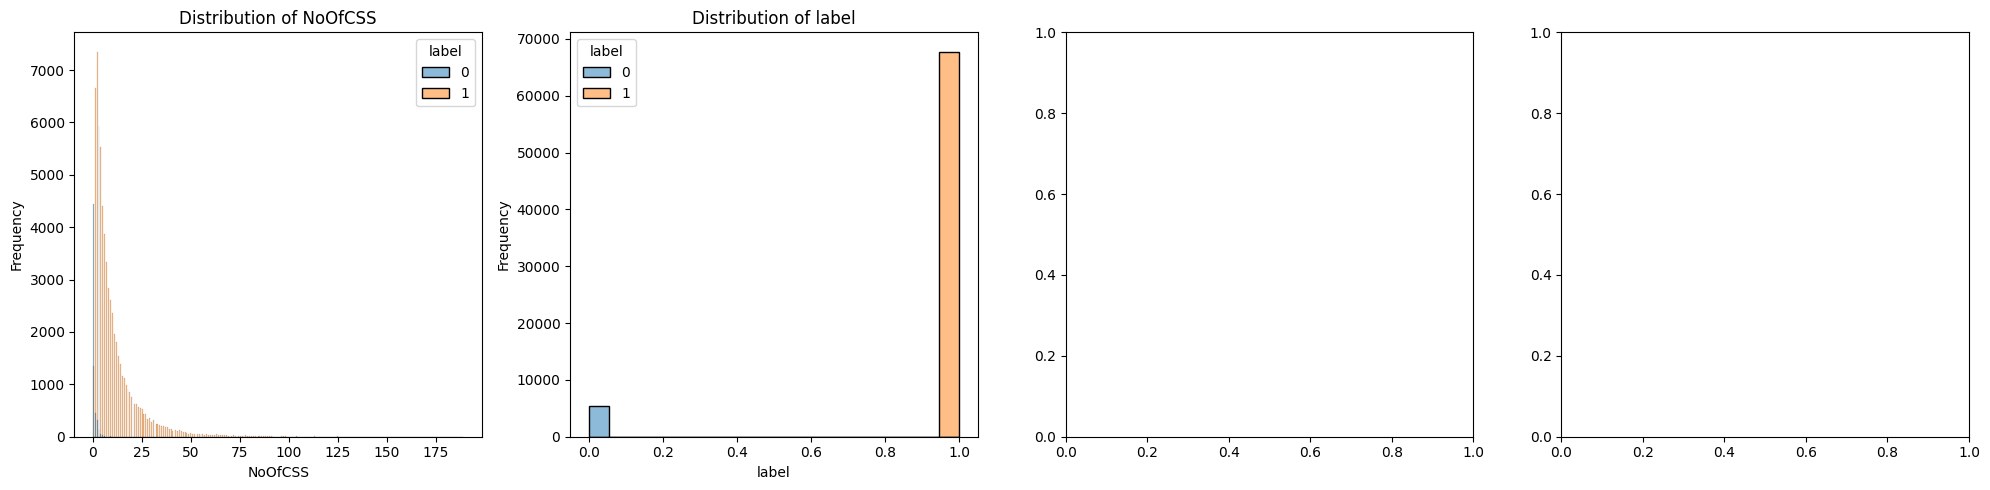

In [46]:
df_noOfCSS = df_insight[df_insight['NoOfCSS'] < 200]
plot_distribution(df_noOfCSS[NoOfCSS_features],type='continuous')

##### Phising and non-phising URLs distribution across NoOfJS feature
With NoOfJS distribution limited to 200

In [47]:
df_insight['NoOfJS'].describe()

count    79603.000000
mean        16.461729
std         21.001274
min          0.000000
25%          6.000000
50%         12.000000
75%         22.000000
max       2828.000000
Name: NoOfJS, dtype: float64

In [48]:
idx_highest_value(df_insight,'NoOfJS')

(array([ 27494, 101997,  19969, ...,  54581,   9590,  53316], dtype=int64),
 array([  23.,   23.,   23., ..., 1294., 1326., 2828.]))

In [49]:
NoOfJS_features = [
    'NoOfJS', 'label'
]

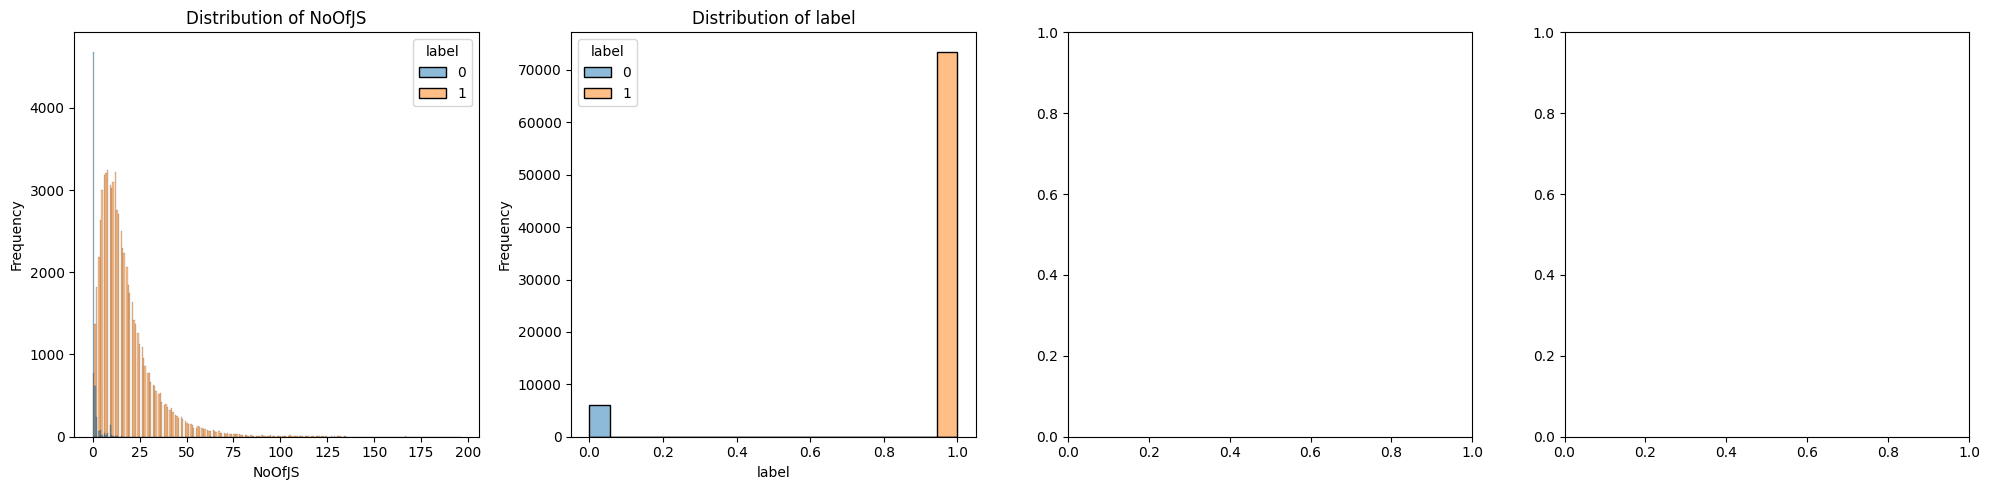

In [50]:
df_NoOfJS = df_insight[df_insight['NoOfJS']< 200]
plot_distribution(df_NoOfJS[NoOfJS_features],type='continuous')

##### Phising and non-phising URLs distribution across NoOfSelfRef feature
With NoOfSelfRef distribution limited to 500

In [51]:
df_insight['NoOfSelfRef'].describe()

count    92272.000000
mean       104.875900
std        219.137035
min          0.000000
25%         24.000000
50%         69.000000
75%        132.000000
max      26596.000000
Name: NoOfSelfRef, dtype: float64

In [52]:
idx_highest_value(df_insight,'NoOfSelfRef')

(array([ 66184, 105224, 114950, ...,  40181,  98643, 106693], dtype=int64),
 array([  133.,   133.,   133., ..., 20017., 24455., 26596.]))

In [53]:
NoOfSelfRef_features = [
    'NoOfSelfRef', 'label'
]

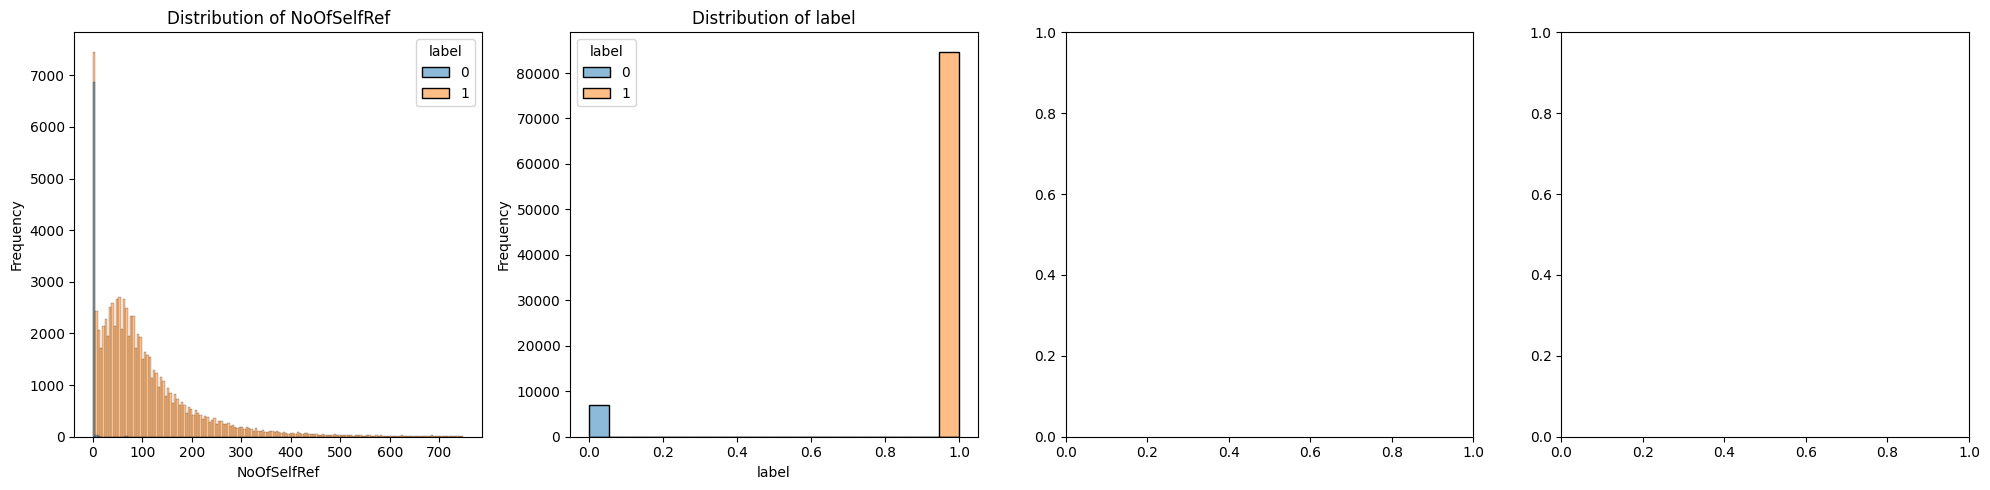

In [54]:
df_NoOfSelfRef = df_insight[df_insight['NoOfSelfRef'] < 750]
plot_distribution(df_NoOfSelfRef[NoOfSelfRef_features],type='continuous')

##### Phising and non-phising URLs distribution across NoOfEmptyRef feature
With NoOfEmptyRef distribution limited to 50

In [55]:
idx_highest_value(df_insight,'NoOfEmptyRef')

(array([    6, 60083, 60080, ..., 60286, 35525, 92613], dtype=int64),
 array([4.000e+00, 4.000e+00, 4.000e+00, ..., 1.336e+03, 1.388e+03,
        4.887e+03]))

In [56]:
NoOfEmptyRef_features = [
    'NoOfEmptyRef', 'label'
]

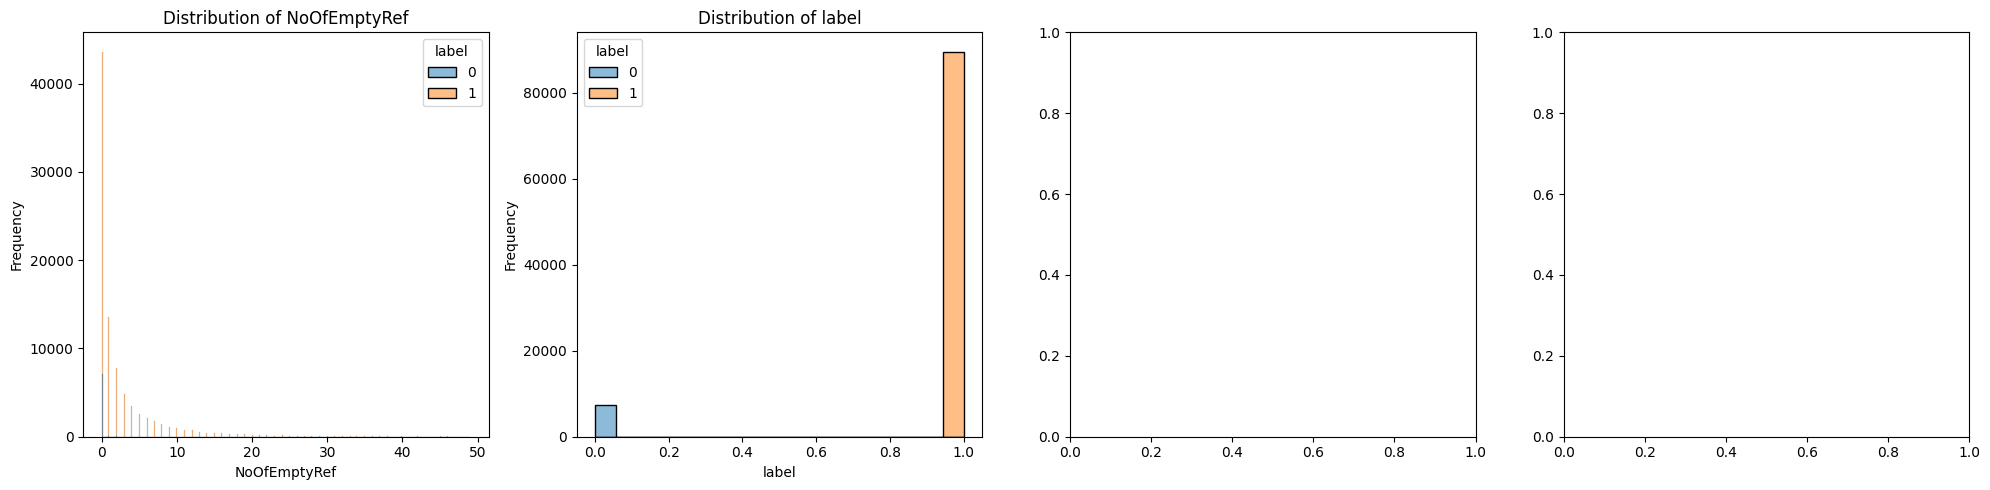

In [57]:
df_NoOfEmptyRef = df_insight[df_insight['NoOfEmptyRef'] < 50]
plot_distribution(df_NoOfEmptyRef[NoOfEmptyRef_features],type='continuous')

##### Phising and non-phising URLs distribution across NoOfExternalRef feature
With NoOfExternalRef distribution limited to 500

In [58]:
df_insight['NoOfExternalRef'].describe()

count    71025.000000
mean        78.104273
std        187.106965
min          0.000000
25%         13.000000
50%         39.000000
75%         99.000000
max      27516.000000
Name: NoOfExternalRef, dtype: float64

In [59]:
idx_highest_value(df_insight,'NoOfExternalRef')

(array([114123,   1546,  68793, ...,  64677,   3277,  73756], dtype=int64),
 array([  100.,   100.,   100., ..., 11901., 16257., 27516.]))

In [60]:
NoOfExternalRef_features = [
    'NoOfExternalRef', 'label'
]

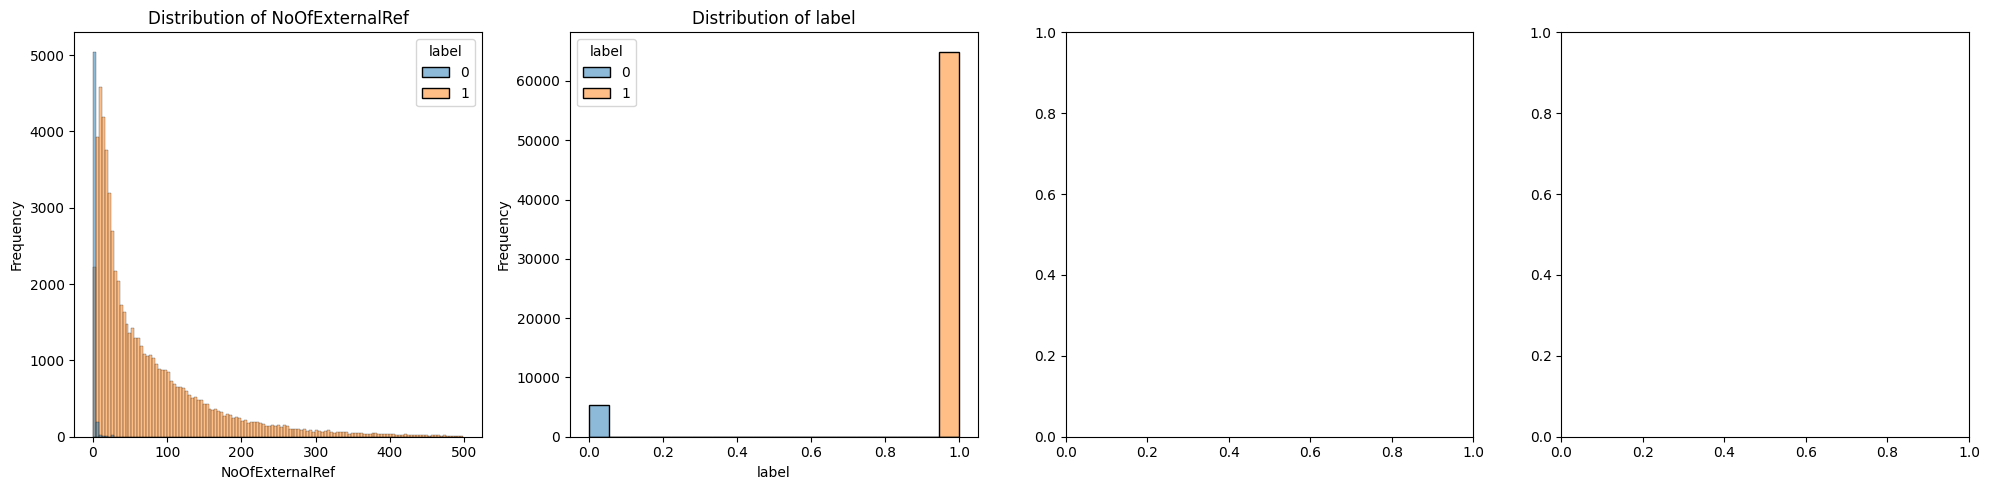

In [61]:
df_NoOfExternalRef = df_insight[df_insight['NoOfExternalRef'] < 500]
plot_distribution(df_NoOfExternalRef[NoOfExternalRef_features],type='continuous')

##### Conclusion
- NoOfImage:
    Most of Phising URLs does not have an image or only have a limited amount of image.
- NoOfCSS:
    Most of Phising URLs does not have a CSS or only have a limited amount of CSS.
- NoOfJS:
    Most of Phising URLs does not have a JS or only have a limited amount of JS.
- NoOfSelfRef:
    Most of Phising URLs does not have a SelfRef.
- NoOfEmptyRef:
    Most of Phising URLs does not have a EmptyRef.
- NoOfExternalRef:
    Most of Phising URLs does not have a ExternalRef or only have a limited amount of ExternalRef.

phising URLs only have a small amount to no website-resource-related features, while non-phising URLs usually having more varied amount of website-resource-related features

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. Analyzing the use of Bank, Pay, and Crypto with phising URLs

In [62]:
financial_features = ['Bank', 'Pay', 'Crypto', 'label']

C:\Users\User_HP\AppData\Local\Temp\ipykernel_17136\184648733.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features].fillna(False,inplace=True,axis=0)


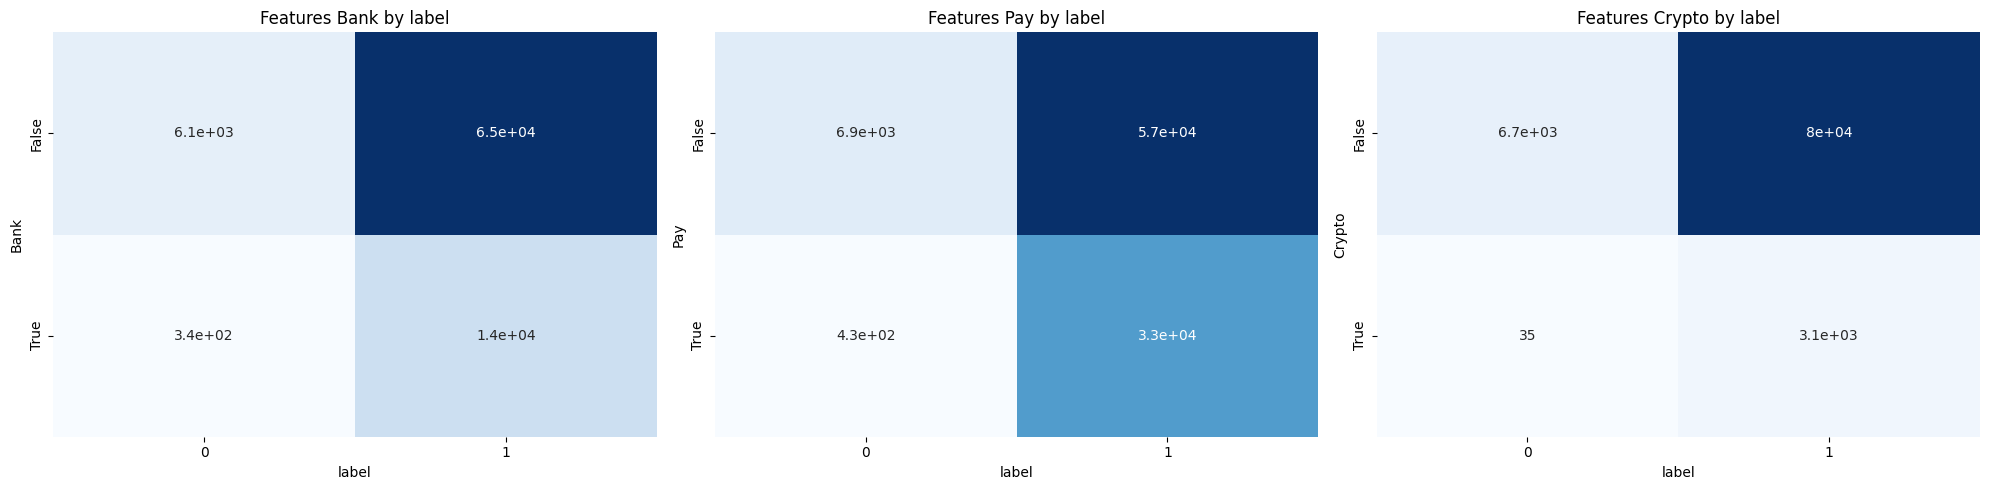

In [63]:
plot_by_label(df_insight[financial_features], target='label', y_type='categorical', type_plot='heatmap')

##### Conclusion
- Bank-related Features:
    - There is a significant number of phishing URLs (label = 1) that reference banking-related terms.
    - The use of these terms is more common in phishing URLs than in non-phishing URLs (label = 0), suggesting attackers often exploit banking-related terms to deceive user
- Pay-related Features:
    - Similar to banking terms, payment-related features are also prominent in phishing URLs.
    - However, the count difference between phishing and non-phishing URLs is less pronounced compared to bank-related terms. This indicates that while payment terms are used, they are slightly less indicative of phishing compared to banking terms.
- Crypto-related Features:
    - Crypto-related features appear much less frequently in both phishing and non-phishing URLs.
    -   Although the count of phishing URLs referencing crypto terms is smaller, it is still non-negligible. This implies that phishing attempts using crypto terms might be more targeted or less widespread compared to banking and payment terms.
Banking and payment-related terms are strong indicators of phishing attempts, with attackers leveraging these topics to exploit user trust. Crypto-related terms are used less frequently but still represent a noteworthy pattern, potentially appealing to a specific subset of victims.

#### 5. Checking Phising and non-Phising URLs by it's domain legitimation TLDLegitimateProb

In [64]:
TLDLegitimateProb_features = df_insight[['TLDLegitimateProb', 'label']]

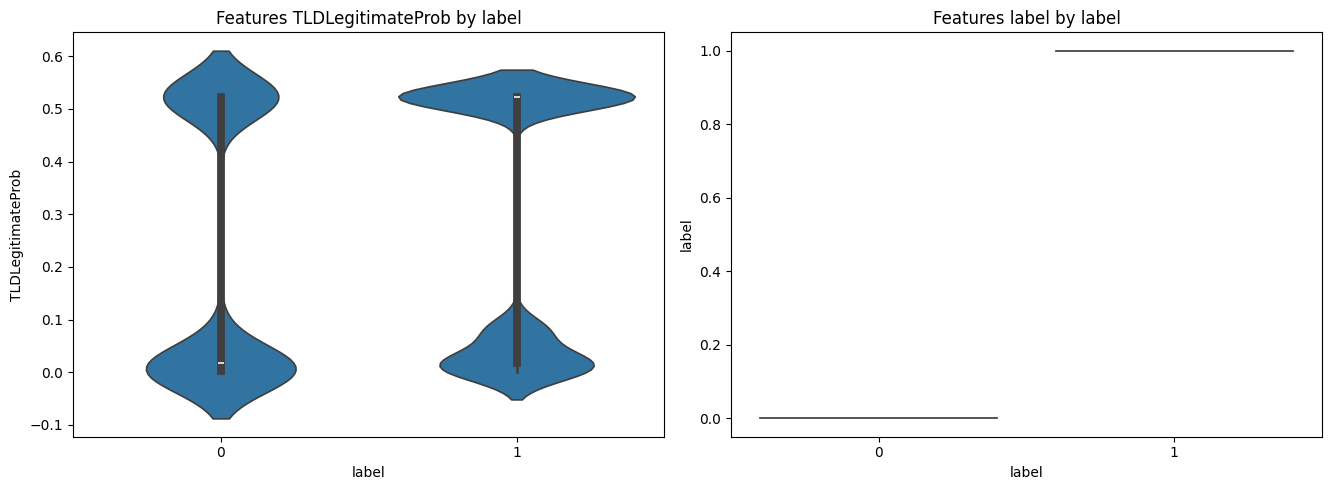

In [65]:
plot_by_label(TLDLegitimateProb_features, target='label', y_type='continuous', type_plot='violin') 

##### Conclusion
- TLD Legitimacy Impact: 
    URLs with more common and trusted TLDs (e.g., .com, .org) show higher LegitimateProb (probability of being legitimate). Phishing Detection: URLs with uncommon or suspicious TLDs are more likely to be flagged as phishing URLs, with a lower LegitimateProb.
- TLD as an Indicator: 
    The domain’s TLD can be an important factor in distinguishing between legitimate and phishing URLs, with certain TLDs having a stronger association with legitimacy..

#### 6. Relation between NoOfObfuscatedChar and NoOfLetter

In [79]:
df_insight1= df[df['NoOfLettersInURL'] <= 400]

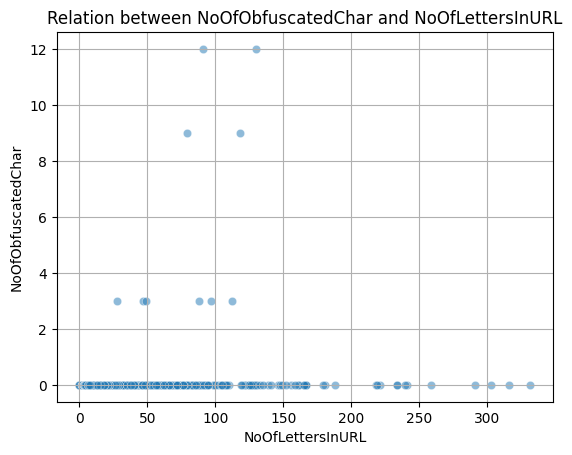

In [80]:
sns.scatterplot(x='NoOfLettersInURL', y='NoOfObfuscatedChar', data=df_insight1, alpha=0.5)
plt.title('Relation between NoOfObfuscatedChar and NoOfLettersInURL')
plt.xlabel('NoOfLettersInURL')
plt.ylabel('NoOfObfuscatedChar')
plt.grid(True)
plt.show()

##### Conclusion
- There's no relation between Obfuscated Character and Letters in URL
- If there's an added variable, it might give a valuable information to conclude a relation